In [16]:
import pandas as pd
import requests
from io import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
url = "https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt"
response = requests.get(url)

In [18]:
lines = response.text.splitlines()

In [19]:
fips_lines = [line.strip() for line in lines if line.strip()[:5].isdigit()]

In [20]:
data = [(line[:5], line[6:]) for line in fips_lines]
fips_df = pd.DataFrame(data, columns=["FIPS", "County"])

In [21]:
fips_df.head()

,FIPS,County
0,01000,Alabama
1,01001,Autauga County
2,01003,Baldwin County
3,01005,Barbour County
4,01007,Bibb County


In [22]:
fips_df["FIPS"].value_counts()

FIPS
01000    1
39089    1
39093    1
39095    1
39097    1
        ..
21117    1
21119    1
21121    1
21123    1
56045    1
Name: count, Length: 3195, dtype: int64

In [23]:
fips_df["FIPS"].min()

'01000'

In [24]:
fips_df["FIPS"].max()

'56045'

In [25]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FIPS    3195 non-null   object
 1   County  3195 non-null   object
dtypes: object(2)
memory usage: 50.1+ KB


In [30]:
df = pd.read_csv("C:/Users/user/Desktop/Climate Change Project/CCES2012_CSVFormat_NEW_countycode.csv")

In [31]:
df

,countycode,tmaxw_3010,CC12,Gender,ccvar1_30_10,ccvar2_30_10,ccvar3_30_10,ccvar4_30_10,raced2,raced3,...,attendd1,attendd2,attendd3,attendd5,attendd6,aged1,aged2,aged3,aged5,aged6
0,1003.0,187.45000,5.0,0.0,0.0,0.0,43.340000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1
1,1003.0,187.45000,2.0,1.0,0.0,0.0,43.340000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,1003.0,187.45000,5.0,0.0,0.0,0.0,43.340000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,1003.0,187.45000,4.0,1.0,0.0,0.0,43.340000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
4,1003.0,187.45000,4.0,1.0,0.0,0.0,43.340000,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54962,NaN,227.60001,NaN,NaN,0.0,0.0,0.000000,23.719999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
54963,NaN,213.03999,NaN,NaN,0.0,0.0,0.000000,29.080000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
54964,NaN,212.56000,NaN,NaN,0.0,0.0,0.000000,38.599998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
54965,NaN,186.16000,NaN,NaN,0.0,0.0,22.209999,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


In [32]:
df["countycode"].value_counts()

countycode
6037.0     1251
4013.0      880
17031.0     877
48201.0     548
32003.0     454
           ... 
17079.0       1
50009.0       1
48009.0       1
29059.0       1
13183.0       1
Name: count, Length: 2653, dtype: int64

In [33]:
df["countycode"].max()

56045.0

In [34]:
df["countycode"].min()

1003.0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54967 entries, 0 to 54966
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   countycode    54482 non-null  float64
 1   tmaxw_3010    54966 non-null  float64
 2   CC12          54318 non-null  float64
 3   Gender        54482 non-null  float64
 4   ccvar1_30_10  54966 non-null  float64
 5   ccvar2_30_10  54966 non-null  float64
 6   ccvar3_30_10  54966 non-null  float64
 7   ccvar4_30_10  54966 non-null  float64
 8   raced2        54482 non-null  float64
 9   raced3        54482 non-null  float64
 10  raced4        54482 non-null  float64
 11  ideologyd1    54413 non-null  float64
 12  ideologyd2    54413 non-null  float64
 13  ideologyd4    54413 non-null  float64
 14  ideologyd5    54413 non-null  float64
 15  PDd1          53470 non-null  float64
 16  PDd2          53470 non-null  float64
 17  PDd3          53470 non-null  float64
 18  PDd5          53470 non-nu

In [36]:
fips_df['FIPS'] = fips_df['FIPS'].astype(float)

In [37]:
fips_df.head()

,FIPS,County
0,1000.0,Alabama
1,1001.0,Autauga County
2,1003.0,Baldwin County
3,1005.0,Barbour County
4,1007.0,Bibb County


In [38]:
merged_df = df.merge(fips_df, left_on='countycode', right_on='FIPS', how='left')

In [39]:
merged=merged_df.drop(columns=["countycode","FIPS"])

In [40]:
merged.head()

,tmaxw_3010,CC12,Gender,ccvar1_30_10,ccvar2_30_10,ccvar3_30_10,ccvar4_30_10,raced2,raced3,raced4,...,attendd2,attendd3,attendd5,attendd6,aged1,aged2,aged3,aged5,aged6,County
0,187.45,5.0,0.0,0.0,0.0,43.34,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,Baldwin County
1,187.45,2.0,1.0,0.0,0.0,43.34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,Baldwin County
2,187.45,5.0,0.0,0.0,0.0,43.34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,Baldwin County
3,187.45,4.0,1.0,0.0,0.0,43.34,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,Baldwin County
4,187.45,4.0,1.0,0.0,0.0,43.34,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,Baldwin County


In [41]:
merged.isna().sum()

tmaxw_3010         1
CC12             649
Gender           485
ccvar1_30_10       1
ccvar2_30_10       1
ccvar3_30_10       1
ccvar4_30_10       1
raced2           485
raced3           485
raced4           485
ideologyd1       554
ideologyd2       554
ideologyd4       554
ideologyd5       554
PDd1            1497
PDd2            1497
PDd3            1497
PDd5            1497
PDd6            1497
PDd7            1497
edu1             485
edu3             485
edu4             485
attendd1        1163
attendd2        1163
attendd3        1163
attendd5        1163
attendd6        1163
aged1              0
aged2              0
aged3              0
aged5              0
aged6              0
County           839
dtype: int64

In [42]:
df_clean = merged.dropna()

In [43]:
df_clean

,tmaxw_3010,CC12,Gender,ccvar1_30_10,ccvar2_30_10,ccvar3_30_10,ccvar4_30_10,raced2,raced3,raced4,...,attendd2,attendd3,attendd5,attendd6,aged1,aged2,aged3,aged5,aged6,County
0,187.45000,5.0,0.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,Baldwin County
1,187.45000,2.0,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,Baldwin County
2,187.45000,5.0,0.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,Baldwin County
3,187.45000,4.0,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,Baldwin County
4,187.45000,4.0,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,Baldwin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54477,245.25999,5.0,1.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,Teton County
54478,245.25999,5.0,0.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,Teton County
54479,245.25999,5.0,1.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Teton County
54480,195.66000,2.0,1.0,0.0,0.0,47.060001,0.00,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0,0,0,1,0,Weston County


In [44]:
x_data=df_clean.drop(["CC12"],axis=1)
y_data=df_clean["CC12"]

In [45]:
x_data

,tmaxw_3010,Gender,ccvar1_30_10,ccvar2_30_10,ccvar3_30_10,ccvar4_30_10,raced2,raced3,raced4,ideologyd1,...,attendd2,attendd3,attendd5,attendd6,aged1,aged2,aged3,aged5,aged6,County
0,187.45000,0.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,Baldwin County
1,187.45000,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,Baldwin County
2,187.45000,0.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,Baldwin County
3,187.45000,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,Baldwin County
4,187.45000,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,Baldwin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54477,245.25999,1.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,Teton County
54478,245.25999,0.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,Teton County
54479,245.25999,1.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Teton County
54480,195.66000,1.0,0.0,0.0,47.060001,0.00,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,1,0,Weston County


In [46]:
y_data

0        5.0
1        2.0
2        5.0
3        4.0
4        4.0
        ... 
54477    5.0
54478    5.0
54479    5.0
54480    2.0
54481    3.0
Name: CC12, Length: 52275, dtype: float64

In [47]:
x_encoded = x_data.copy()
for col in x_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x_data[col].astype(str))


In [48]:
x_encoded

,tmaxw_3010,Gender,ccvar1_30_10,ccvar2_30_10,ccvar3_30_10,ccvar4_30_10,raced2,raced3,raced4,ideologyd1,...,attendd2,attendd3,attendd5,attendd6,aged1,aged2,aged3,aged5,aged6,County
0,187.45000,0.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,77
1,187.45000,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,77
2,187.45000,0.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,77
3,187.45000,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,77
4,187.45000,1.0,0.0,0.0,43.340000,0.00,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54477,245.25999,1.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,1422
54478,245.25999,0.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1422
54479,245.25999,1.0,0.0,0.0,0.000000,29.16,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1422
54480,195.66000,1.0,0.0,0.0,47.060001,0.00,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,1,0,1543


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_data, test_size=0.2, random_state=42)

## Starting the Modeling Respect to Numeric Perspective with County Variable Included:

#### Random Forest Model 

In [50]:
rf_reg = RandomForestRegressor(n_estimators=250,max_depth=50,max_features='sqrt',min_samples_leaf=2,min_samples_split=2, random_state=1234)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=250, random_state=1234)

In [223]:
importances = rf_reg.feature_importances_
feature_importance = pd.Series(importances, index=x_encoded.columns).sort_values(ascending=False)
print("Top Features by Gini Importance:")
print(feature_importance)

Top Features by Gini Importance:
PDd7            0.120024
ideologyd5      0.106359
County          0.086498
tmaxw_3010      0.084975
PDd1            0.077596
ccvar4_30_10    0.069022
ideologyd4      0.067326
PDd5            0.051858
ideologyd2      0.040969
ideologyd1      0.034432
PDd3            0.027896
ccvar3_30_10    0.022767
Gender          0.016186
PDd2            0.015145
edu1            0.015045
PDd6            0.013770
raced2          0.012914
attendd1        0.012731
ccvar2_30_10    0.011123
aged5           0.010655
edu3            0.009712
attendd6        0.009528
aged6           0.009424
attendd5        0.009169
attendd2        0.008818
aged2           0.008656
edu4            0.008500
attendd3        0.007712
aged1           0.006858
aged3           0.006811
raced3          0.006650
raced4          0.005863
ccvar1_30_10    0.005009
dtype: float64


In [224]:
pred_test = rf_reg.predict(x_test)
mse_test = mean_squared_error(y_test, pred_test)
print("TEST Mean Absolute Error:", mse_test)

TEST Mean Absolute Error: 0.8236047946092664


In [225]:
pred_train = rf_reg.predict(x_train)
mse_train = mean_squared_error(y_train, pred_train)
print("TRAIN Mean Absolute Error:", mse_train)

TRAIN Mean Absolute Error: 0.41325281733663044


In [226]:
r2_score(y_train,pred_train)

0.7155855794929562

In [227]:
r2_score(y_test,pred_test)

0.4303618640337873

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=1234),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

In [ ]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=1234),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=1234,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score (MSE):", -random_search.best_score_)

#### Bagging Tree

In [254]:
bagging_reg = RandomForestRegressor(n_estimators=250,max_depth=60,max_features='sqrt',min_samples_leaf=2,min_samples_split=5,bootstrap=True, random_state=567)
bagging_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=250, random_state=567)

In [255]:
importances = bagging_reg.feature_importances_
feature_importance = pd.Series(importances, index=x_encoded.columns).sort_values(ascending=False)
print("Top Features by Gini Importance:")
print(feature_importance)

Top Features by Gini Importance:
ideologyd5      0.119467
PDd7            0.107365
PDd1            0.085055
County          0.083223
tmaxw_3010      0.082333
ideologyd4      0.072642
ccvar4_30_10    0.066274
PDd5            0.046600
ideologyd2      0.042172
ideologyd1      0.033261
PDd3            0.029276
ccvar3_30_10    0.022215
PDd2            0.016411
Gender          0.015750
edu1            0.015153
PDd6            0.014641
raced2          0.013297
attendd1        0.011811
ccvar2_30_10    0.010900
aged5           0.010250
edu3            0.009555
attendd6        0.009447
attendd5        0.009100
aged6           0.009075
attendd2        0.008845
aged2           0.008572
edu4            0.008399
attendd3        0.007763
aged1           0.006810
raced3          0.006739
aged3           0.006711
raced4          0.005900
ccvar1_30_10    0.004986
dtype: float64


In [256]:
pred_test_bag = bagging_reg.predict(x_test)
mse_test_bag = mean_squared_error(y_test, pred_test_bag)
print("TEST Mean Absolute Error:", mse_test_bag)

TEST Mean Absolute Error: 0.8220282190765432


In [257]:
pred_train_bag = bagging_reg.predict(x_train)
mse_train_bag = mean_squared_error(y_train, pred_train_bag)
print("TRAIN Mean Absolute Error:", mse_train_bag)

TRAIN Mean Absolute Error: 0.4310689160531306


In [258]:
r2_score(y_train,pred_train_bag)

0.703323944049532

In [259]:
r2_score(y_test,pred_test_bag)

0.43145228695695215

#### XgBoosting

In [ ]:
param_grid = {
    'n_estimators': [200,250,300],
    'max_depth': [10,15],
    'learning_rate': [0.01,0.001],
    'subsample': [0.8,1],
    'colsample_bytree': [0.8,1]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=1234),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

In [53]:
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1234
)

In [54]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_pred_xg_train = xgb_reg.predict(x_train)
y_pred_xg_test = xgb_reg.predict(x_test)

In [58]:
print("MSE:", mean_squared_error(y_test, y_pred_xg_test))
print("R²:", r2_score(y_test, y_pred_xg_test))
print("MSE:", mean_squared_error(y_train, y_pred_xg_train))
print("R²:", r2_score(y_train, y_pred_xg_train))

MSE: 0.9191689496166576
R²: 0.3642658584253905
MSE: 0.7036600350441065
R²: 0.5157176123060487


## Starting Modeling Respect to Numeric Perspective without Count Variable 

#### Random Forest

In [60]:
x_encoded_new=x_encoded.drop(columns=["County"])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded_new, y_data, test_size=0.2, random_state=1234)

In [274]:
rf_reg = RandomForestRegressor(n_estimators=250,max_depth=50,max_features='sqrt',min_samples_leaf=2,min_samples_split=5, random_state=1234)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=250, random_state=1234)

In [275]:
importances = rf_reg.feature_importances_
feature_importance = pd.Series(importances, index=x_encoded_new.columns).sort_values(ascending=False)
print("Top Features by Gini Importance:")
print(feature_importance)

Top Features by Gini Importance:
ideologyd5      0.124326
PDd7            0.112859
tmaxw_3010      0.104186
PDd1            0.089501
ccvar4_30_10    0.085159
ideologyd4      0.079236
PDd5            0.050457
ideologyd2      0.040849
PDd3            0.031864
ideologyd1      0.029381
ccvar3_30_10    0.026326
Gender          0.016989
PDd2            0.016920
edu1            0.016119
PDd6            0.014064
raced2          0.013950
ccvar2_30_10    0.013256
attendd1        0.012582
aged5           0.011123
edu3            0.010658
attendd6        0.010494
aged6           0.009855
attendd5        0.009680
attendd2        0.009175
aged2           0.009142
edu4            0.008721
attendd3        0.008165
aged1           0.007691
raced3          0.007558
aged3           0.007378
raced4          0.006590
ccvar1_30_10    0.005749
dtype: float64


In [276]:
pred_test = rf_reg.predict(x_test)
mse_test = mean_squared_error(y_test, pred_test)
print("TEST Mean Absolute Error:", mse_test)

TEST Mean Absolute Error: 0.834591506599634


In [277]:
pred_train = rf_reg.predict(x_train)
mse_train = mean_squared_error(y_train, pred_train)
print("TRAIN Mean Absolute Error:", mse_train)

TRAIN Mean Absolute Error: 0.46683107835834403


In [278]:
r2_score(y_train,pred_train)

0.6770167078338911

In [279]:
r2_score(y_test,pred_test)

0.4348677820720035

#### Bagging

In [286]:
bagging_reg = RandomForestRegressor(n_estimators=250,max_depth=60,max_features='sqrt',min_samples_leaf=2,min_samples_split=10,bootstrap=True, random_state=567)
bagging_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=250, random_state=567)

In [287]:
importances = bagging_reg.feature_importances_
feature_importance = pd.Series(importances, index=x_encoded_new.columns).sort_values(ascending=False)
print("Top Features by Gini Importance:")
print(feature_importance)

Top Features by Gini Importance:
ideologyd5      0.135714
PDd7            0.123734
PDd1            0.098995
tmaxw_3010      0.083095
ideologyd4      0.081267
ccvar4_30_10    0.068602
PDd5            0.055131
ideologyd2      0.047402
PDd3            0.035039
ideologyd1      0.033848
ccvar3_30_10    0.023225
PDd2            0.017856
edu1            0.015448
Gender          0.015274
PDd6            0.014592
raced2          0.014094
ccvar2_30_10    0.012428
attendd1        0.012214
attendd6        0.010585
aged5           0.009266
edu3            0.009172
attendd5        0.008726
aged6           0.008643
edu4            0.008538
aged2           0.008504
attendd2        0.007633
aged1           0.007582
raced3          0.007443
attendd3        0.007152
aged3           0.006735
raced4          0.006490
ccvar1_30_10    0.005575
dtype: float64


In [288]:
pred_test_bag = bagging_reg.predict(x_test)
mse_test_bag = mean_squared_error(y_test, pred_test_bag)
print("TEST Mean Absolute Error:", mse_test_bag)

TEST Mean Absolute Error: 0.8290797493517422


In [289]:
pred_train_bag = bagging_reg.predict(x_train)
mse_train_bag = mean_squared_error(y_train, pred_train_bag)
print("TRAIN Mean Absolute Error:", mse_train_bag)

TRAIN Mean Absolute Error: 0.5475901220934193


In [290]:
r2_score(y_train,pred_train_bag)

0.6211424890276633

In [291]:
r2_score(y_test,pred_test_bag)

0.43859999306810227

#### XgBoosting

In [ ]:
param_grid = {
    'n_estimators': [50,100,150,200,250,300],
    'max_depth': [3,5,7,10,15],
    'learning_rate': [0.01, 0.1,0.001],
    'subsample': [0.8, 0.9,1],
    'colsample_bytree': [0.6,0.7,0.8,0.9,1]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=1234),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

In [62]:
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.01,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1234
)

In [63]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
y_pred_xg_train = xgb_reg.predict(x_train)
y_pred_xg_test = xgb_reg.predict(x_test)

In [67]:
print("MSE:", mean_squared_error(y_test, y_pred_xg_test))
print("R²:", r2_score(y_test, y_pred_xg_test))
print("MSE:", mean_squared_error(y_train, y_pred_xg_train))
print("R²:", r2_score(y_train, y_pred_xg_train))

MSE: 0.9327311666011556
R²: 0.3684138542704528
MSE: 0.7159306046073605
R²: 0.5046738866407242


## Creating Keras/Tensorflow Deep Learning Model 

In [292]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [293]:
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [294]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [295]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.7665 - mae: 2.1224 - val_loss: 0.9278 - val_mae: 0.7710
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9949 - mae: 0.7875 - val_loss: 0.9739 - val_mae: 0.7721
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0029 - mae: 0.7905 - val_loss: 0.8774 - val_mae: 0.7454
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9160 - mae: 0.7545 - val_loss: 0.8641 - val_mae: 0.7387
Epoch 5/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.9389 - mae: 0.7656 - val_loss: 0.8396 - val_mae: 0.7249
Epoch 6/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9011 - mae: 0.7517 - val_loss: 0.8484 - val_mae: 0.7320
Epoch 7/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8701 - mae: 0.7350 - val_loss: 0.8342 - val_mae: 0.7188
Epoch 8/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8651 - mae: 0.7321 - val_loss: 0.8976 - val_mae: 0.7614
Epoch 9/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms

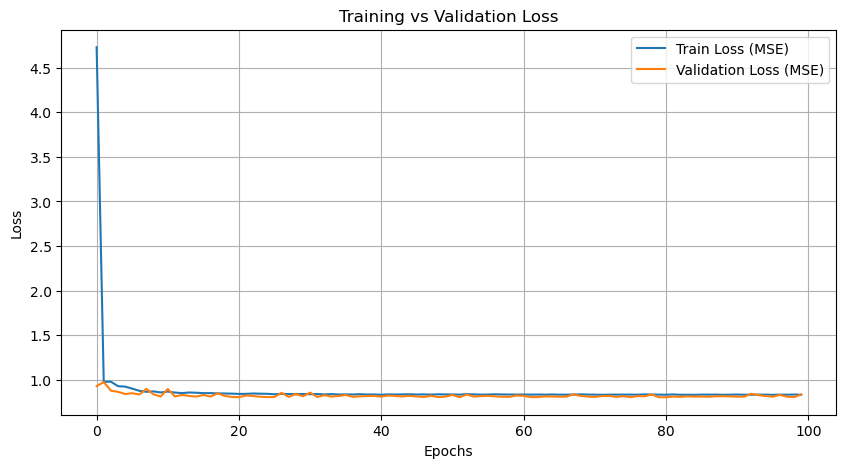

In [296]:

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [297]:
y_pred_keras = model.predict(x_train)

1307/1307 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step


In [299]:
y_pred_keras_test = model.predict(x_test)

327/327 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


In [298]:
r2_score(y_train,y_pred_keras)

0.41525924757650634

In [300]:
r2_score(y_test,y_pred_keras_test)

0.42383018494825386